In [21]:
import pandas as pd

df = pd.read_csv('results-survey384925(3).csv')

In [22]:
df

,Response ID,Date submitted,Last page,Start language,Seed,Date started,Date last action,How did you find out about the software consultation services offered by Helmholtz? [HIFIS website (e.g. after reading a blog or article there)],How did you find out about the software consultation services offered by Helmholtz? [HIFIS mailing list],How did you find out about the software consultation services offered by Helmholtz? [Advertised on social media (e.g. Twitter)],How did you find out about the software consultation services offered by Helmholtz? [Advertised via an internal service (e.g. GitLab or notice board system)],How did you find out about the software consultation services offered by Helmholtz? [Mentioned in a talk or workshop],How did you find out about the software consultation services offered by Helmholtz? [Mentioned by a colleague],How did you find out about the software consultation services offered by Helmholtz? [Other],Please rate your experience of the following aspects of the consultation [Response time],"Please rate your experience of the following aspects of the consultation [Methods of communication (i.e. emails, video calls, face-to-face meetings, etc.)]",Please rate your experience of the following aspects of the consultation [Relevance of support given during the consultation],Please rate your experience of the following aspects of the consultation [Impact of the consultation on your project or work],How likely are you to recommend using these consultation services to others? [],Please feel free to share your consultation expectations and experiences or any other comments to help us improve our service.
0,10,2021-04-27 11:02:04,4.0,en,1.167793e+09,2021-04-27 10:58:09,2021-04-27 11:02:04,Yes,No,No,No,No,No,NaN,Excellent,Excellent,Excellent,Excellent,10 (Extremely likely),"From my perspective, nothing to improve! Pleas..."
1,11,NaN,NaN,en,8.951892e+08,2021-04-27 11:07:48,2021-04-27 11:07:48,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,12,2021-04-27 11:35:47,4.0,en,1.839371e+09,2021-04-27 11:34:40,2021-04-27 11:35:46,No,No,No,No,No,Yes,NaN,Excellent,Excellent,Excellent,Excellent,10 (Extremely likely),NaN
3,13,2021-04-27 11:36:27,4.0,en,1.382293e+09,2021-04-27 11:36:05,2021-04-27 11:36:27,No,No,No,No,No,Yes,NaN,Excellent,Excellent,Excellent,Excellent,10 (Extremely likely),NaN
4,14,2021-04-27 11:43:01,4.0,en,1.138141e+09,2021-04-27 11:42:22,2021-04-27 11:43:01,No,No,No,No,Yes,No,NaN,Excellent,Excellent,Excellent,Excellent,10 (Extremely likely),NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,74,2023-08-28 17:14:58,4.0,en,4.515877e+08,2023-08-28 17:13:42,2023-08-28 17:14:58,No,No,No,No,No,No,Direct Contact with HIFIS colleagues,Above average,Excellent,Above average,Excellent,10 (Extremely likely),I would certainly contact HIFIS in the future....
60,75,2023-08-30 16:47:34,4.0,en,2.057037e+09,2023-08-30 16:43:58,2023-08-30 16:47:34,No,No,No,No,No,No,from HIDA GIT workschop,Excellent,Excellent,Excellent,Excellent,10 (Extremely likely),My experience with HIDA consultants is so far ...
61,76,2023-09-05 11:41:08,4.0,en,1.534484e+09,2023-09-05 11:39:54,2023-09-05 11:41:08,No,Yes,No,No,No,No,NaN,Above average,Excellent,Above average,Average,9,NaN
62,77,NaN,NaN,en,1.535053e+09,2023-09-29 13:31:36,2023-09-29 13:31:36,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
df['Date started'] = pd.to_datetime(df['Date started'])
df['Date last action'] = pd.to_datetime(df['Date last action'])
def convert_rating_to_numeric(rating_text):
    if rating_text == "10 (Extremely likely)":
        return 10
    elif rating_text == "0 (Not likely at all)":
        return 0
    else:
        return pd.to_numeric(rating_text, errors='coerce')
recommendation_column = 'How likely are you to recommend using these consultation services to others?  []'
# Anwenden der Umwandlungsfunktion auf die Bewertungsspalte
df[recommendation_column] = df[recommendation_column].apply(convert_rating_to_numeric)


In [24]:
#df = df[(df['Date started'].dt.year == 2023) | (df['Date last action'].dt.year == 2023)]

In [25]:
print(df.head())

   Response ID       Date submitted  Last page Start language          Seed  \
0           10  2021-04-27 11:02:04        4.0             en  1.167793e+09   
1           11                  NaN        NaN             en  8.951892e+08   
2           12  2021-04-27 11:35:47        4.0             en  1.839371e+09   
3           13  2021-04-27 11:36:27        4.0             en  1.382293e+09   
4           14  2021-04-27 11:43:01        4.0             en  1.138141e+09   

         Date started    Date last action  \
0 2021-04-27 10:58:09 2021-04-27 11:02:04   
1 2021-04-27 11:07:48 2021-04-27 11:07:48   
2 2021-04-27 11:34:40 2021-04-27 11:35:46   
3 2021-04-27 11:36:05 2021-04-27 11:36:27   
4 2021-04-27 11:42:22 2021-04-27 11:43:01   

  How did you find out about the software consultation services offered by Helmholtz? [HIFIS website (e.g. after reading a blog or article there)]  \
0                                                Yes                                                    

In [26]:

# Konvertieren Sie 'Date last action' in ein Datumsformat, falls noch nicht geschehen
df['Date last action'] = pd.to_datetime(df['Date last action'])

# Filtern der Daten für das Jahr 2023 und 2022
df_2023 = df[df['Date last action'].dt.year == 2023]
df_2022 = df[df['Date last action'].dt.year == 2022]

# Definition der Aspekte der Beratung
aspects = [
    'Please rate your experience of the following aspects of the consultation [Response time]',
    'Please rate your experience of the following aspects of the consultation [Methods of communication (i.e. emails, video calls, face-to-face meetings, etc.)]',
    'Please rate your experience of the following aspects of the consultation [Relevance of support given during the consultation]',
    'Please rate your experience of the following aspects of the consultation [Impact of the consultation on your project or work]'
]

# Funktion zur Berechnung der Prozentsätze für die Bewertungen
def calculate_aspect_percentages(df):
    percentages = {}
    for aspect in aspects:
        percentages[aspect] = df[aspect].value_counts(normalize=True) * 100
    return percentages

# Berechnen der Prozentwerte für die Bewertungen für 2023 und 2022
percentages_2023 = calculate_aspect_percentages(df_2023)
percentages_2022 = calculate_aspect_percentages(df_2022)

# Ausgabe der Ergebnisse
print("Bewertungen für 2023:")
for aspect, percentages in percentages_2023.items():
    print(f"{aspect}:")
    print(percentages)

print("\nBewertungen für 2022:")
for aspect, percentages in percentages_2022.items():
    print(f"{aspect}:")
    print(percentages)

Bewertungen für 2023:
Please rate your experience of the following aspects of the consultation [Response time]:
Above average    66.666667
Excellent        33.333333
Name: Please rate your experience of the following aspects of the consultation [Response time], dtype: float64
Please rate your experience of the following aspects of the consultation [Methods of communication (i.e. emails, video calls, face-to-face meetings, etc.)]:
Excellent        83.333333
Above average    16.666667
Name: Please rate your experience of the following aspects of the consultation [Methods of communication (i.e. emails, video calls, face-to-face meetings, etc.)], dtype: float64
Please rate your experience of the following aspects of the consultation [Relevance of support given during the consultation]:
Excellent        41.666667
Above average    41.666667
Average          16.666667
Name: Please rate your experience of the following aspects of the consultation [Relevance of support given during the consulta

In [27]:
# Funktion zur Berechnung der durchschnittlichen Bewertung
def calculate_average_rating(df, aspect):
    ratings_mapping = {"Very poor": 1, "Below average": 2, "Average": 3, "Above average": 4, "Excellent": 5}
    df_mapped = df[aspect].map(ratings_mapping)
    return df_mapped.mean()

# Durchschnittliche Bewertungen für 2023 und 2022 berechnen
average_ratings_2023 = {aspect: calculate_average_rating(df_2023, aspect) for aspect in aspects}
average_ratings_2022 = {aspect: calculate_average_rating(df_2022, aspect) for aspect in aspects}

# Ausgabe der durchschnittlichen Bewertungen
print("Durchschnittliche Bewertungen für 2023:")
print(average_ratings_2023)
print("\nDurchschnittliche Bewertungen für 2022:")
print(average_ratings_2022)

Durchschnittliche Bewertungen für 2023:
{'Please rate your experience of the following aspects of the consultation [Response time]': 4.333333333333333, 'Please rate your experience of the following aspects of the consultation [Methods of communication (i.e. emails, video calls, face-to-face meetings, etc.)]': 4.833333333333333, 'Please rate your experience of the following aspects of the consultation [Relevance of support given during the consultation]': 4.25, 'Please rate your experience of the following aspects of the consultation [Impact of the consultation on your project or work]': 4.25}

Durchschnittliche Bewertungen für 2022:
{'Please rate your experience of the following aspects of the consultation [Response time]': 4.25, 'Please rate your experience of the following aspects of the consultation [Methods of communication (i.e. emails, video calls, face-to-face meetings, etc.)]': 4.666666666666667, 'Please rate your experience of the following aspects of the consultation [Relevan

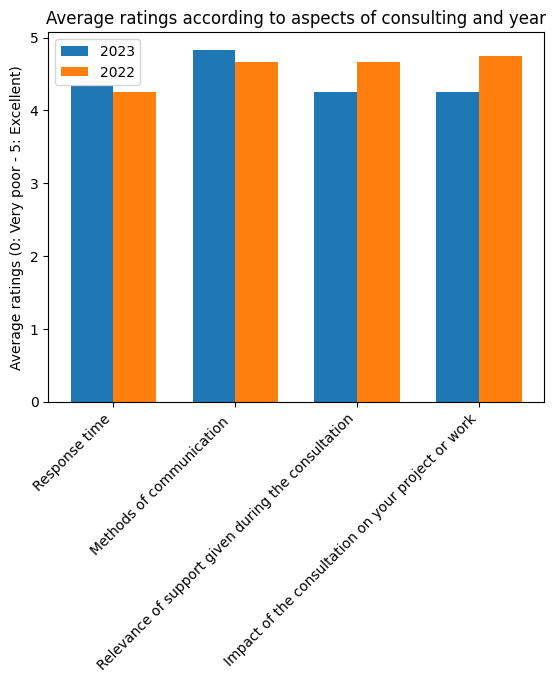

In [28]:
import matplotlib.pyplot as plt
import re  # Regular Expressions Modul für komplexere String-Operationen

# Stellen Sie sicher, dass Sie calculate_average_rating wie im vorherigen Beispiel definiert haben

# Berechnen Sie die durchschnittlichen Bewertungen für 2023 und 2022
average_ratings_2023 = {aspect: calculate_average_rating(df_2023, aspect) for aspect in aspects}
average_ratings_2022 = {aspect: calculate_average_rating(df_2022, aspect) for aspect in aspects}

# Erstellen Sie Listen für die Plots und extrahieren Sie den Text innerhalb der eckigen Klammern
aspects_list = [re.search(r'\[(.*?)\]', re.sub(r'\(.*?\)', '', aspect)).group(1) if re.search(r'\[(.*?)\]', re.sub(r'\(.*?\)', '', aspect)) else re.sub(r'\(.*?\)', '', aspect).strip() for aspect in aspects]
ratings_2023 = [average_ratings_2023[aspect] for aspect in aspects]
ratings_2022 = [average_ratings_2022[aspect] for aspect in aspects]

# Erstellen Sie ein Balkendiagramm
x = list(range(len(aspects_list)))  # die Label-Positionen, konvertiert in eine Liste von int
width = 0.35  # die Breite der Balken

fig, ax = plt.subplots()
rects1 = ax.bar([xi - width/2 for xi in x], ratings_2023, width, label='2023')
rects2 = ax.bar([xi + width/2 for xi in x], ratings_2022, width, label='2022')

# Hinzufügen von Texten für Labels, Titel und benutzerdefinierte X-Achsen-Tick-Labels usw.
ax.set_ylabel('Average ratings (0: Very poor - 5: Excellent)')
ax.set_title('Average ratings according to aspects of consulting and year')
ax.set_xticks(x)
ax.set_xticklabels(aspects_list, rotation=45, ha="right")
ax.legend()

# Zeigen Sie die Diagramme
plt.show()


In [39]:
# Funktion zur Berechnung des NPS und Ausgabe der Zahlen für Promotoren und Detraktoren
def calculate_nps(dataframe):
    promoters = dataframe[dataframe[recommendation_column] >= 9]
    passives = dataframe[(dataframe[recommendation_column] == 7) | (dataframe[recommendation_column] == 8)]
    detractors = dataframe[dataframe[recommendation_column] <= 6]

    if len(dataframe) > 0:
        promoter_count = len(promoters)
        detractor_count = len(detractors)
        nps = (promoter_count - detractor_count) / len(dataframe) * 100
        return nps, promoter_count, len(passives), detractor_count
    else:
        return None, 0, 0, 0

# Berechnung des NPS für 2023 und 2022
nps_2023, promoters_2023, passives_2023, detractors_2023 = calculate_nps(df_2023)
nps_2022, promoters_2022, passives_2022, detractors_2022 = calculate_nps(df_2022)

print(f"Net Promoter Score (NPS) für 2023: {nps_2023:.2f}, Promotoren: {promoters_2023}, Passives: {passives_2023}, Detraktoren: {detractors_2023}")
print(f"Net Promoter Score (NPS) für 2022: {nps_2022:.2f}, Promotoren: {promoters_2022}, Passives: {passives_2022}, Detraktoren: {detractors_2022}")


Net Promoter Score (NPS) für 2023: 75.00, Promotoren: 9, Passives: 3, Detraktoren: 0
Net Promoter Score (NPS) für 2022: 54.55, Promotoren: 7, Passives: 3, Detraktoren: 1
